# Question 2
"The ovarian cancer data set, which is built into Matlab (https://www.mathworks.com/ help/deeplearning/ug/cancer-detection.html;jsessionid=627f60893b3f0b28b252d72a6dbd), provides a realistic example to illustrate the benefits of PCA. This example consists of
gene data for 216 patients, 121 of which have ovarian cancer, and 95 which do not. For
each patient, there is a vector of data on the expression of 4000 genes. Use this data
set and find the principal vectors as well as plot the data against them. Explain your
thought process. Can you distinguish the two different groups from that plot?"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Building the Datasets
I am using the cancer data downloaded from MATLAB in separate CSV files. I will load these files using pandas in the following function:

In [5]:
def build_dataset():
    ''' Builds the dataset from data that was downloaded from MATLAB '''
    
    Y = pd.read_csv('ovarian_cancerY.csv', header = None).to_numpy()
    grp = pd.read_csv('ovarian_cancer_grp.csv', header = None).to_numpy()

    grp = [(0 if grp[i,0] == 'N' else 1) for i in range(0, grp.shape[0])]

    return (Y.T, grp)

X, Y = build_dataset()

## Plotting the Data
In the below function, I define a function that will be used to plot the projected data in a 3d space.

In [6]:
def plot_projected_data_3d(data, labels):

    ax = plt.axes(projection = '3d')
    
    data0 = []
    data1 = []
    
    for i in range(0, len(labels)):
        l = labels[i]
        if (l == 0):
            data0.append(data[i,:])
        else:
            data1.append(data[i,:])
            
    data0 = np.array(data0)
    data1 = np.array(data1)

    ax.scatter3D(data0[:,0], data0[:,1], data0[:,2], label = "Normal")
    ax.scatter3D(data1[:,0], data1[:,1], data1[:,2], label = "Cancer")
    plt.title("Ovarian Cancer Dataset in 3d")
    plt.legend()
    
    plt.show()

## PCA Algorithm
Principal component analysis (PCA) is a dimensionality reduction technique commonly used in data analysis. The algorithm is as follows:

1. Find the covariance matrix $\Sigma$ for the data
2. Find eigenvalues for $\Sigma$
3. Order eigenvalues for $\Sigma$ such that for each eigenvalue $\lambda_i$:

$$\lambda_1 \geq \lambda_2 \geq ... \geq \lambda_n$$

where $n$ is the number of features in the dataset. In addition, this leads to an ordering of eigenvectors that correspond to each eigenvalue. i.e. if $v_i$ is the eigenvector corresponding to $\lambda_i$, then we have the ordering:

$$v_1, v_2, ..., v_n$$

4. Choose the eigenvectors corresponding to the $r$ largest eigenvalues .
5. Use these chosen eigenvectors as basis vectors and project the original dataset onto this new subspace.

This step will produce a new dataset $\tilde{S}$ which is of $r$ dimensions. The algorithm seeks to reduce the representation error of this derived dataset, so $\tilde{S}$ is very representative of $S$ for its given dimensionality.

In the code below, I use sklearn's implementation of PCA to derive a 3d dataset based on the Ovarian Cancer dataset.

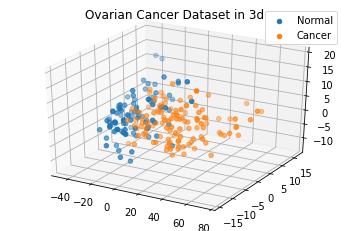

In [7]:
pca = PCA(n_components = 3)
reduced_X = pca.fit_transform(X)
plot_projected_data_3d(reduced_X, Y)

In the above plot, it seems as if we can distinguish the classes in the data. There is some overlap, but the classes look fairly separable.

## PCA to Two Dimensions
After viewing the above results, I wondered if we would have similar results in two dimensions. Therefore, I define a 2d plotting function as well as running sklearn PCA keeping 2 dimensions.

In [8]:
def plot_projected_data_2d(data, labels):
    
    data0 = []
    data1 = []
    
    for i in range(0, len(labels)):
        l = labels[i]
        if (l == 0):
            data0.append(data[i,:])
        else:
            data1.append(data[i,:])
            
    data0 = np.array(data0)
    data1 = np.array(data1)

    plt.scatter(data0[:,0], data0[:,1], label = "Normal")
    plt.scatter(data1[:,0], data1[:,1], label = "Cancer")
    plt.title("Ovarian Cancer Dataset in 2d")
    plt.legend()
    
    plt.show()

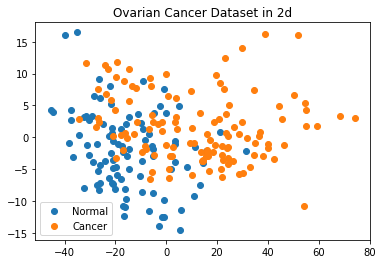

In [9]:
pca = PCA(n_components = 2)
reduced_X = pca.fit_transform(X)
plot_projected_data_2d(reduced_X, Y)

From this plot, we can see similar results to the 3d case. The point clouds for each class have distinctly different centroids, but there is some overlap in the data. Therefore, PCA gives us a good way to distinguish these classes while representing the data in a lower dimension. 